In [1]:
# Dependencies
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
# Read the csv file into a pandas DataFrame
HREmployeeAttrition = pd.read_csv('../Resources/HREmployeeAttrition.csv')
HREmployeeAttrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Select our independent X variables, and our dependent y variable. 
X = HREmployeeAttrition.drop(columns = ['YearsWithCurrManager'])
y = HREmployeeAttrition['YearsWithCurrManager']

In [4]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print("Attrition:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Attrition:
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

Percentage:
2     0.234014
0     0.178912
7     0.146939
3     0.096599
8     0.072789
4     0.066667
1     0.051701
9     0.043537
5     0.021088
6     0.019728
10    0.018367
11    0.014966
12    0.012245
13    0.009524
17    0.004762
14    0.003401
15    0.003401
16    0.001361
Name: YearsWithCurrManager, dtype: float64


### Imbalanced

In [5]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [6]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print("Attrition:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Attrition:
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

Percentage:
2     0.234014
0     0.178912
7     0.146939
3     0.096599
8     0.072789
4     0.066667
1     0.051701
9     0.043537
5     0.021088
6     0.019728
10    0.018367
11    0.014966
12    0.012245
13    0.009524
17    0.004762
14    0.003401
15    0.003401
16    0.001361
Name: YearsWithCurrManager, dtype: float64


In [7]:
# Create a Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [8]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [9]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

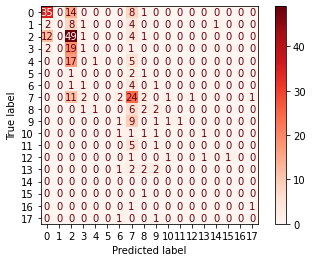

In [10]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

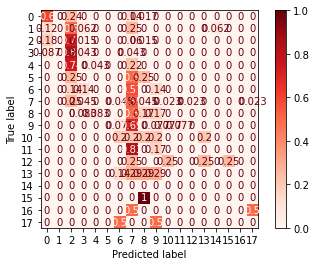

In [11]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [15]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=["1","2","3","4","5","6","7","8","9","10",'11','12','13','14','15','16','17',"18"]))

              precision    recall  f1-score   support

           1       0.69      0.60      0.64        58
           2       0.00      0.00      0.00        16
           3       0.41      0.73      0.52        67
           4       0.14      0.04      0.07        23
           5       0.50      0.04      0.08        23
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         7
           8       0.31      0.55      0.40        44
           9       0.18      0.17      0.17        12
          10       0.11      0.08      0.09        13
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00    

/Users/char4488/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/char4488/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/char4488/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/char4488/op

### Balanced

In [16]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [17]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print("Attrition:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Attrition:
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

Percentage:
2     0.234014
0     0.178912
7     0.146939
3     0.096599
8     0.072789
4     0.066667
1     0.051701
9     0.043537
5     0.021088
6     0.019728
10    0.018367
11    0.014966
12    0.012245
13    0.009524
17    0.004762
14    0.003401
15    0.003401
16    0.001361
Name: YearsWithCurrManager, dtype: float64


In [18]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [19]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [20]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

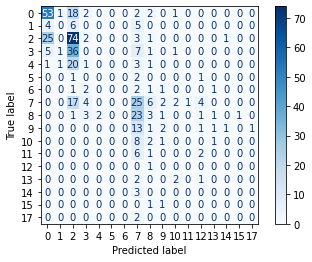

In [21]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)

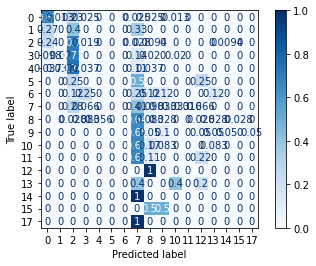

In [22]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [24]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["1","2","3","4","5","6","7","8","9","10",'11','12','13','14','15','16','17',]))

              precision    recall  f1-score   support

           1       0.60      0.67      0.63        79
           2       0.00      0.00      0.00        15
           3       0.43      0.70      0.53       106
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         8
           8       0.24      0.41      0.30        61
           9       0.14      0.08      0.11        36
          10       0.25      0.10      0.14        20
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2

    accuracy              

/Users/char4488/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/char4488/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/char4488/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
